# LU Decomposition

In [1]:
import numpy as np
np.set_printoptions(precision=1)

최소제곱법은 $Ax = B$ 문제를 풀기위해서 $x = (A^{T}A)^{-1}A^{T}B$ 로 해를 구한다. 그런데 부동소수점에 의한 반올림 오차로인해서 사실 $A^{T}A$가 가역적인데 비가역적으로 되어 문제를 풀수없는 경우가 발생하게 된다. 아래가 그 예시이다. 이론적으론 가역적이지만 비가역적이 된다. 이러한경우 A^{T}A를 계산하지 않는 LU분해 혹은 QR분해를 통해 문제를 풀 수 있다.
[example](https://m.blog.naver.com/ldj1725/221221847744)

In [2]:
A = np.array([[1,1],[1e-5, 0],[0, 1e-5]])
print(A.T@A)

[[1. 1.]
 [1. 1.]]


## 이론
연립 선형 방정식 Ax = b를 풀때 가우스 소거 (Gaussian Elimination) 방법을 통해서 문제를 효율적으로 풀 수 있다.  
정사각행렬 A에 기본행 연산을 하여 얻은 사다리꼴 REF(row echelon form)로 만들면 상삼각행렬 U(upper triangular matirx)를 얻을 수 있다.  
A 를 REF로 만들기 위한 기본행 연산들은 모두 하 삼각행렬 U(Lower triangular matirx) 이며 역행렬이 존재한다.   
이러한 기본행 연산들 곱에 대한 역함수를 L로 두면 A를 LU로 분해 할 수 있다.  
LU 분해의 유일성에 대해서는 [이곳](https://ghebook.blogspot.com/2020/07/gaussian-elimination.html) 을 참조하도록 하자.  
결론적으로 LU 분해의 유일하게 되려면 A의 선행 주 부분 행렬 (leading principal submatrix) 들의 행렬식이 모두 0이 아니어야 한다.    
그말은 U의 대각 요소에 0이 없어야 한다는 말과 같다.  
순열행렬 P를 사용하여 A를 바꾸면 U의 대각 요소에 0이 없도록 만들 수 있다.  
순열행렬을 통해 행 바꾸기만 하면 부분적 주축 (partial pivoting),  
열 바꾸기도 하면 완전 주축 (full pivoting) 이라고 한다.  
LU 분해를 하면 행렬연산을 쉽게할 수 있는 이점이 있다.  
아래와 같은 성질을 이용하면 된다.   
- 순열행렬 $P$의 역행렬은 전치$P^{T}$ 이다.  
- 삼각 행렬의 행렬식은 대각선 원소의 곱이다
- $|L|=1$ 이다.  
- A 행렬식은 상삼각 행렬 U 에 있는 모든 대각선 원소의 곱이다.
- U의 0이 아닌 대각 원소의 개수가 A의 Rank이다.
- 대칭 행렬은 다음처럼 LU 분해할 수 있다.
 > $A = LDL^{T} = U^{T}DU$ 대칭 행렬의 LU 분해는 $L=U^{T}$를 만족한다.



## Scipy 모듈
$$
A = PLU
$$

In [3]:
from scipy .linalg import lu

A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
[p, l, u] = lu(A)
print("A = {}".format(A))
print("P = {}".format(p))
print("L = {}".format(l))
print("U = {}".format(u))
np.allclose(A, p@l@u)

A = [[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
P = [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
L = [[ 1.   0.   0.   0. ]
 [ 0.3  1.   0.   0. ]
 [ 0.7  0.1  1.   0. ]
 [ 0.7 -0.4 -0.5  1. ]]
U = [[ 7.   5.   6.   6. ]
 [ 0.   3.6  6.3  5.3]
 [ 0.   0.  -1.   3.1]
 [ 0.   0.   0.   7.5]]


True

## LU dompostion solver
A가 dense해야 해의 유일성 조건을 만족하기 쉽다.  
그래서 A 가 dense한 경우 그리고 Ax=b에서 b만 달라지는 경우에 주로 사용된다.  

$$
PAx = LUx = Pb 
$$

위의 식을 풀기 위해서 2단계 과정을 거친다.  
$y = Ux$ 로두고 $Ly =pb$ 를 $y$에 대해서 푸는 전진대입과  
$Ux = y$를 x에 대해서 푸는 후진대입을 하면된다.  
b만 바뀐다면 매번 가우스 소거법을 통해서 x를 구하는 것에 비해 간단하게 문제를 풀 수 있다.  
$L x = b$ 에서 [전진대입의 해](https://ko.wikipedia.org/wiki/%EC%82%BC%EA%B0%81%ED%96%89%EB%A0%AC)는 다음과 같다.
$$
x_{m}={{b_{m}-\left(\sum _{i=1}^{m-1}\ell _{m,i}x_{i}\right)} \over {\ell _{m,m}}}
$$
$U x = b$ 에서 후진대입의 해는 다음과 같다.
$$
x_{m}={{b_{m}-\left(\sum _{i=1}^{n-m} u _{m,m+i} x_{m+i}\right)} \over { u_{m,m}}}
$$

In [4]:
from scipy.linalg import lu_factor, lu_solve

b = np.array([1, 1, 1, 1])
lu, piv = lu_factor(A)
x = lu_solve((lu, piv), b)
L, U = np.tril(lu, k=-1) + np.eye(4), np.triu(lu)
print('L={}'.format(L))
print('U={}'.format(U))
print('x={}'.format(x))
np.allclose(A @ x - b, np.zeros((4,)))

L=[[ 1.   0.   0.   0. ]
 [ 0.3  1.   0.   0. ]
 [ 0.7  0.1  1.   0. ]
 [ 0.7 -0.4 -0.5  1. ]]
U=[[ 7.   5.   6.   6. ]
 [ 0.   3.6  6.3  5.3]
 [ 0.   0.  -1.   3.1]
 [ 0.   0.   0.   7.5]]
x=[ 0.1 -0.1  0.1  0.1]


True

In [5]:
def ForwardSub(L, b):
    x = np.zeros_like(b)
    for m in range(len(x)):
        tmp = 0
        for i in range(m):
            tmp += L[m][i] * x[i]
        x[m] = (b[m] - tmp) / L[m][m]
    return x

def BackwardSub(U,b):
    x = np.zeros_like(b)
    n = len(b)
    for m in range(n - 1, -1, -1):
        tmp = 0
        for i in range(n - m):
            tmp += U[m][m+i] * x[m + i]
        x[m] = (b[m] - tmp) / U[m][m]
    return x

np.allclose(BackwardSub(U, ForwardSub(L,p@b)), x)

True

Doolittle Algorithm for lu decomposition

$$
u_{ij} = 
\begin{cases} 
a_{ij} & i = 0 , \forall j \\
a_{ij} - \sum_{k=0}^{i-1}l_{ik}u_{kj} & i > 0, \forall j
\end{cases}
$$

$$
l_{ij} = 
\begin{cases}
\frac{a_{ij}}{u_{jj}}  &  j = 0 , \forall i \\
\frac{a_{ij} - \sum_{k=0}^{j-1} l_{ik}u_{kj} } {u_{jj}} & j > 0, \forall i
\end{cases}
$$

In [6]:
# Python3 Program to decompose
# a matrix into lower and
# upper traingular matrix
MAX = 100
 

def luDecomposition(mat, n):
 
    lower = [[0 for x in range(n)]
             for y in range(n)]
    upper = [[0 for x in range(n)]
             for y in range(n)]
 
    # Decomposing matrix into Upper
    # and Lower triangular matrix
    for i in range(n):
 
        # Upper Triangular
        for k in range(i, n):
 
            # Summation of L(i, j) * U(j, k)
            sum = 0
            for j in range(i):
                sum += (lower[i][j] * upper[j][k])
 
            # Evaluating U(i, k)
            upper[i][k] = mat[i][k] - sum
 
        # Lower Triangular
        for k in range(i, n):
            if (i == k):
                lower[i][i] = 1  # Diagonal as 1
            else:
 
                # Summation of L(k, j) * U(j, i)
                sum = 0
                for j in range(i):
                    sum += (lower[k][j] * upper[j][i])
 
                # Evaluating L(k, i)
                lower[k][i] = int((mat[k][i] - sum) /
                                  upper[i][i])
 
    # setw is for displaying nicely
    print("Lower Triangular\t\tUpper Triangular")
 
    # Displaying the result :
    for i in range(n):
 
        # Lower
        for j in range(n):
            print(lower[i][j], end="\t")
        print("", end="\t")
 
        # Upper
        for j in range(n):
            print(upper[i][j], end="\t")
        print("")
        
    return lower, upper
 
# Driver code
mat = [[2, -1, -2],
       [-4, 6, 3],
       [-4, -2, 8]]
 
L, U = luDecomposition(mat, 3)

Lower Triangular		Upper Triangular
1	0	0		2	-1	-2	
-2	1	0		0	4	-1	
-2	-1	1		0	0	3	


# Toy Example

Lower Triangular		Upper Triangular
1	0	0	0		8	140	3500	98000	
17	1	0	0		0	1120	38500	1256500	
437	32	1	0		0	0	161000	7616000	
12250	1078	38	1		0	0	0	43397500	


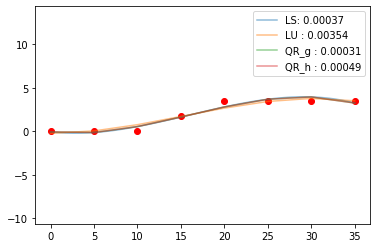

In [24]:
import matplotlib.pyplot as plt 
import time

# Least Square
x = [0, 5, 10, 15, 20, 25, 30, 35]
y = [0, 0, 0, 1.75, 3.5, 3.5, 3.5, 3.5]
A = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3)]).T
B = y
plt.axis('equal')
plt.scatter(x,y, color='r')

p_time = time.time()
w = np.linalg.inv(A.T@A)@A.T@B
x = np.linspace(0,35,100)
A = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3)]).T
y = A@w
plt.plot(x,y, label='LS: {:.5f}'.format(time.time()- p_time), alpha=0.5)

# LU Decomposition
x = [0, 5, 10, 15, 20, 25, 30, 35]
y = [0, 0, 0, 1.75, 3.5, 3.5, 3.5, 3.5]
A = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3)]).T
B = y

p_time = time.time()
L,U = luDecomposition(A.T@A, 4)
w = BackwardSub(U, ForwardSub(L,A.T@B))
y = A@w
plt.plot(x,y, label='LU : {:.5f}'.format(time.time()- p_time), alpha=0.5)

# QR Decomposition with Gramshcmidt
def gramshcmidt(A, n):
    Q = np.zeros_like(A,dtype=float) # int형으로 되면 반올림 오차가 심함
    for k in range(n):
        tmp = 0        
        for i in range(k):             
            tmp += (np.dot(A[:,k], Q[:,i]) / np.dot(Q[:,i], Q[:,i])) * Q[:,i]
        Q[:,k] = A[:,k] - tmp
        Q[:,k] = Q[:,k] / np.sqrt(np.dot(Q[:,k],Q[:,k]))
    return Q

x = [0, 5, 10, 15, 20, 25, 30, 35]
y = [0, 0, 0, 1.75, 3.5, 3.5, 3.5, 3.5]
A = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3)]).T
B = y

p_time = time.time()
Q = gramshcmidt(A,4)
R = Q.T @ A
w = BackwardSub(R, Q.T@B)
y = A@w
plt.plot(x,y, label='QR_g : {:.5f}'.format(time.time()- p_time), alpha=0.5)

# QR Decomposition with householder
import copy
def household(A):
    """
    returns Q.T
    """
    n = A.shape[1]
    Q = np.eye(len(A), dtype=float)
    B = copy.deepcopy(A)
    for i in range(n):
        B = (Q@A)[i:,i:]
        v = B[:,0]
        w = np.zeros_like(v, dtype=float)
        w[0] = np.sqrt(np.dot(v,v))
        a = v-w
        a = a.reshape(len(a),1)
        H = np.eye(len(a), dtype=float) - 2.0 / np.dot(a.T, a) * a @ a.T
        K = np.eye(len(A), dtype=float)
        K[i:,i:] = H
        Q = K@Q        
    return Q

x = [0, 5, 10, 15, 20, 25, 30, 35]
y = [0, 0, 0, 1.75, 3.5, 3.5, 3.5, 3.5]
A = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3)]).T
B = y

p_time = time.time()
Q_t = household(A)
R = Q_t@A
w = BackwardSub(R, Q.T@B)
y = A@w
plt.plot(x,y, label='QR_h : {:.5f}'.format(time.time()- p_time), alpha=0.5)

plt.legend()

## Reference
[LU분해 이론](https://ghebook.blogspot.com/2020/07/gaussian-elimination.html)  
[이론 예제](https://wikidocs.net/75791)  
[scipy decompostion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html)  
[scipy lu composition solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html)  
[Doolittle Algorithm for lu decomposition](https://www.geeksforgeeks.org/doolittle-algorithm-lu-decomposition/)  